#### **Preliminary Analysis (Visual Exploration):**
Before diving into more advanced statistical analyses, a preliminary exploration was conducted using Seaborn and Matplotlib. The goal of this analysis was to generate a variety of bar plots to visualize the distribution of mortality rates across different categories. This exploration helped to understand the impact of specific factors—such as smoking, age, gender, diabetes, hypertension, and other chronic conditions—on the severity and fatality of COVID-19.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [34]:
covid = pd.read_csv("covid_positive")
df = pd.DataFrame(covid)
covid.sample(20)

,COVID_TEST_RESULT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,DEAD,AGE,SEX,PREGNANT,SMOKER,PNEUMONIA,COPD,ASTHMA,IMMUNOSUPPRESSED,CARDIOVASCULAR_DISEASE,HYPERTENSION,CHRONIC_KIDNEY_DISEASE,DIABETES,OBESITY,OTHER_DISEASE,MEDICAL_UNIT
35373,1,1,1.0,0.0,0,45,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
93683,1,0,NaN,NaN,0,56,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12
41087,1,0,NaN,NaN,0,54,female,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
88947,1,1,1.0,0.0,1,60,male,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
8169,1,1,0.0,0.0,1,59,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
101750,1,0,NaN,NaN,0,19,female,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12
55759,1,1,0.0,0.0,0,62,male,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6
46560,1,1,0.0,0.0,0,70,male,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4
35862,1,0,NaN,NaN,0,60,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4
51728,1,1,0.0,0.0,1,54,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,6


In [35]:
covid.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113288 entries, 0 to 113287
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COVID_TEST_RESULT       113288 non-null  int64  
 1   HOSPITALIZED            113288 non-null  int64  
 2   INTUBED                 75002 non-null   float64
 3   ADMITTED_TO_ICU         74994 non-null   float64
 4   DEAD                    113288 non-null  int64  
 5   AGE                     113288 non-null  int64  
 6   SEX                     113288 non-null  object 
 7   PREGNANT                46901 non-null   float64
 8   SMOKER                  112098 non-null  float64
 9   PNEUMONIA               113284 non-null  float64
 10  COPD                    112218 non-null  float64
 11  ASTHMA                  112222 non-null  float64
 12  IMMUNOSUPPRESSED        112083 non-null  float64
 13  CARDIOVASCULAR_DISEASE  112140 non-null  float64
 14  HYPERTENSION        

In [36]:
# List of comorbidity columns
comorbidities = ['COPD', 'ASTHMA', 'IMMUNOSUPPRESSED', 'CARDIOVASCULAR_DISEASE', 
                 'HYPERTENSION', 'CHRONIC_KIDNEY_DISEASE', 'DIABETES', 'OBESITY', 'OTHER_DISEASE']

# Total number of patients
total_patients = len(covid)

# Count patients with each comorbidity and calculate percentage
comorbidity_counts = covid[comorbidities].sum()  # Count occurrences of '1' for each condition
comorbidity_percentages = (comorbidity_counts / total_patients * 100).round(1)  # Convert to percentage

# Create a DataFrame to display results
comorbidity_summary = pd.DataFrame({
    'Comorbidity': comorbidities,
    'Count': comorbidity_counts.values,
    'Percentage': comorbidity_percentages.values
})

# Display the DataFrame
comorbidity_summary

,Comorbidity,Count,Percentage
0,COPD,5825.0,5.1
1,ASTHMA,6060.0,5.3
2,IMMUNOSUPPRESSED,4351.0,3.8
3,CARDIOVASCULAR_DISEASE,7593.0,6.7
4,HYPERTENSION,44866.0,39.6
5,CHRONIC_KIDNEY_DISEASE,7361.0,6.5
6,DIABETES,38582.0,34.1
7,OBESITY,32271.0,28.5
8,OTHER_DISEASE,7424.0,6.6


**Hypertension (39.6%) and diabetes (34.1%) are the most common comorbidities among COVID-19 patients, followed by obesity (28.5%). Other conditions, such as cardiovascular disease (6.7%), chronic kidney disease (6.5%), and respiratory diseases like asthma (5.3%) and COPD (5.1%), are less prevalent but still notable.**

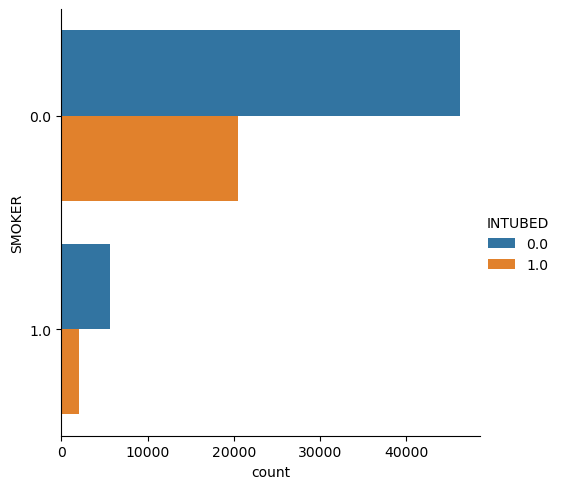

In [37]:
sns.catplot(data=covid, y="SMOKER", hue="INTUBED", kind="count")

In [38]:
# Calculating the percentage of intubation cases in each smoker group relative to the entire dataset
total_counts = len(covid)
percentage_data = (covid.groupby("SMOKER")['INTUBED'].value_counts() / total_counts * 100).round(2)
percentage_data

SMOKER  INTUBED
0.0     0.0        40.79
        1.0        18.14
1.0     0.0         4.98
        1.0         1.77
Name: count, dtype: float64

In [39]:
# Calculating the percentage of intubation cases in each smoker group, relative to the total in that group
intubation_smoker_distribution = covid.groupby("SMOKER")['INTUBED'].value_counts(normalize=True).mul(100).round(2)
intubation_smoker_distribution

SMOKER  INTUBED
0.0     0.0        69.22
        1.0        30.78
1.0     0.0        73.81
        1.0        26.19
Name: proportion, dtype: float64

In [40]:
intubation_smoker_distribution = intubation_smoker_distribution.reset_index(name='Percentage')
intubation_smoker_distribution

,SMOKER,INTUBED,Percentage
0,0.0,0.0,69.22
1,0.0,1.0,30.78
2,1.0,0.0,73.81
3,1.0,1.0,26.19


<Axes: xlabel='Percentage', ylabel='SMOKER'>

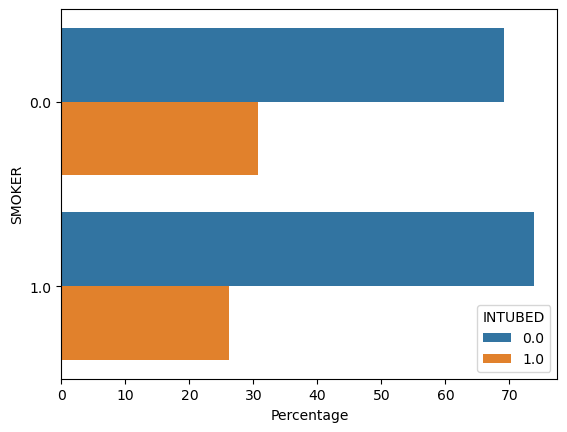

In [41]:
sns.barplot(data=intubation_smoker_distribution, y="SMOKER", x="Percentage", hue="INTUBED", orient='h')

In [42]:
hospitalization_smoker_distribution = covid.groupby("SMOKER")['HOSPITALIZED'].value_counts(normalize=True).mul(100).round(2)
hospitalization_smoker_distribution = hospitalization_smoker_distribution.reset_index(name='Percentage')
hospitalization_smoker_distribution

,SMOKER,HOSPITALIZED,Percentage
0,0.0,1,69.23
1,0.0,0,30.77
2,1.0,1,56.51
3,1.0,0,43.49


<Axes: xlabel='Percentage', ylabel='SMOKER'>

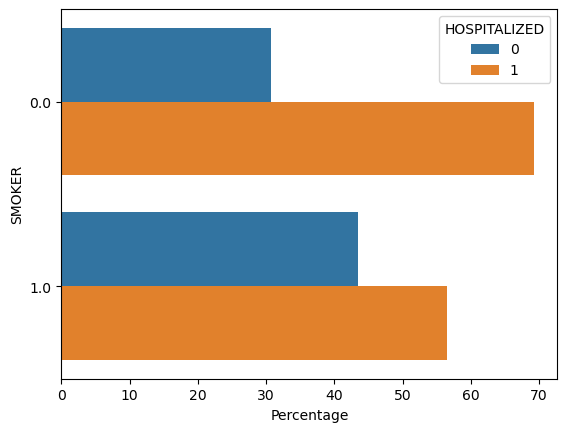

In [43]:
sns.barplot(data=hospitalization_smoker_distribution, y="SMOKER", x="Percentage", hue="HOSPITALIZED", orient='h')

In [44]:
death_smoker_distribution = covid.groupby("SMOKER")['DEAD'].value_counts(normalize=True).mul(100).round(2)
death_smoker_distribution = death_smoker_distribution.reset_index(name='Percentage')
death_smoker_distribution

,SMOKER,DEAD,Percentage
0,0.0,0,50.66
1,0.0,1,49.34
2,1.0,0,68.08
3,1.0,1,31.92


<Axes: xlabel='Percentage', ylabel='SMOKER'>

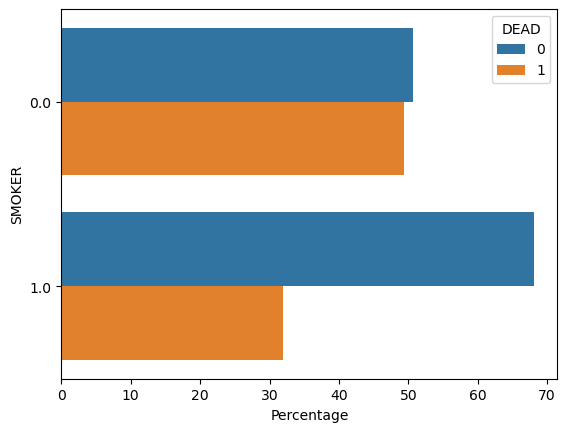

In [45]:
sns.barplot(data=death_smoker_distribution, y="SMOKER", x="Percentage", hue="DEAD", orient='h')

**In this dataset, smokers appear to have both lower hospitalization and lower mortality rates compared to non-smokers, which may seem counterintuitive given the well-known health risks associated with smoking.**

In [46]:
death_gender_distribution = covid.groupby("SEX")['DEAD'].value_counts(normalize=True).mul(100).round(2)
death_gender_distribution = death_gender_distribution.reset_index(name='Percentage')
death_gender_distribution

,SEX,DEAD,Percentage
0,female,0,60.49
1,female,1,39.51
2,male,1,52.57
3,male,0,47.43


<Axes: xlabel='Percentage', ylabel='SEX'>

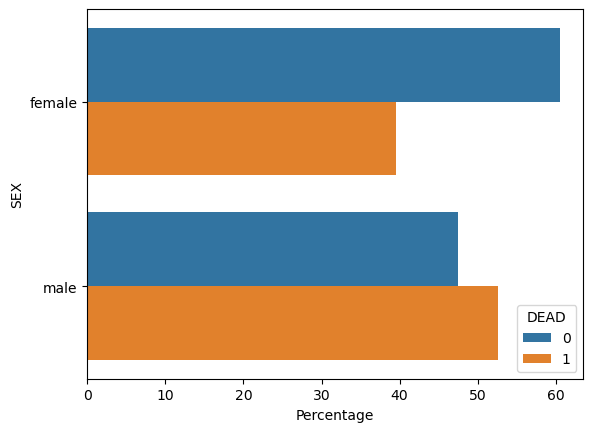

In [47]:
sns.barplot(data=death_gender_distribution, y="SEX", x="Percentage", hue="DEAD", orient='h')

**In this dataset, males have a higher mortality rate than females. This is consistent with some studies suggesting that males may be at higher risk of severe outcomes, including death, from COVID-19 compared to females.**

<Axes: xlabel='Percentage', ylabel='PNEUMONIA'>

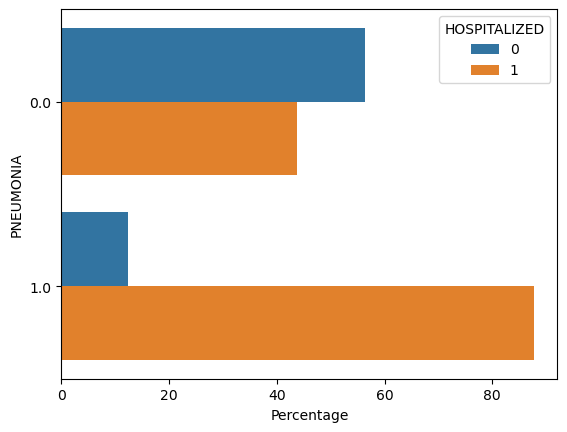

In [48]:
hospitalization_pneumonia_distribution = covid.groupby("PNEUMONIA")['HOSPITALIZED'].value_counts(normalize=True).mul(100).round(2)
hospitalization_pneumonia_distribution = hospitalization_pneumonia_distribution.reset_index(name='Percentage')
sns.barplot(data=hospitalization_pneumonia_distribution, y="PNEUMONIA", x="Percentage", hue="HOSPITALIZED", orient='h')

<Axes: xlabel='Percentage', ylabel='PNEUMONIA'>

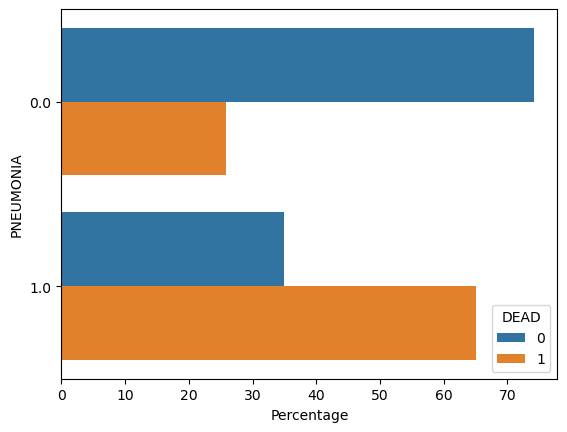

In [49]:
death_pneumonia_distribution = covid.groupby("PNEUMONIA")['DEAD'].value_counts(normalize=True).mul(100).round(2)
death_pneumonia_distribution = death_pneumonia_distribution.reset_index(name='Percentage')
sns.barplot(data=death_pneumonia_distribution, y="PNEUMONIA", x="Percentage", hue="DEAD", orient='h')

**More than 60% of patients with pneumonia due to COVID-19 died, compared to around 25% mortality in patients without pneumonia. Since pneumonia was a complication of COVID-19 rather than a pre-existing condition, it appears to be a strong predictor of poor outcomes for affected patients.**

<Axes: xlabel='Percentage', ylabel='INTUBED'>

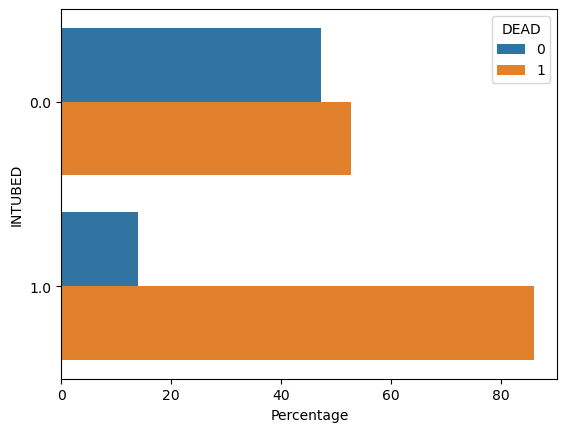

In [50]:
death_intubed_distribution = covid.groupby("INTUBED")['DEAD'].value_counts(normalize=True).mul(100).round(2)
death_intubed_distribution = death_intubed_distribution.reset_index(name='Percentage')
sns.barplot(data=death_intubed_distribution, y="INTUBED", x="Percentage", hue="DEAD", orient='h')

**Nearly 90% of intubated patients died.**

In [51]:
print(covid.columns.tolist())

['COVID_TEST_RESULT', 'HOSPITALIZED', 'INTUBED', 'ADMITTED_TO_ICU', 'DEAD', 'AGE', 'SEX', 'PREGNANT', 'SMOKER', 'PNEUMONIA', 'COPD', 'ASTHMA', 'IMMUNOSUPPRESSED', 'CARDIOVASCULAR_DISEASE', 'HYPERTENSION', 'CHRONIC_KIDNEY_DISEASE', 'DIABETES', 'OBESITY', 'OTHER_DISEASE', 'MEDICAL_UNIT']


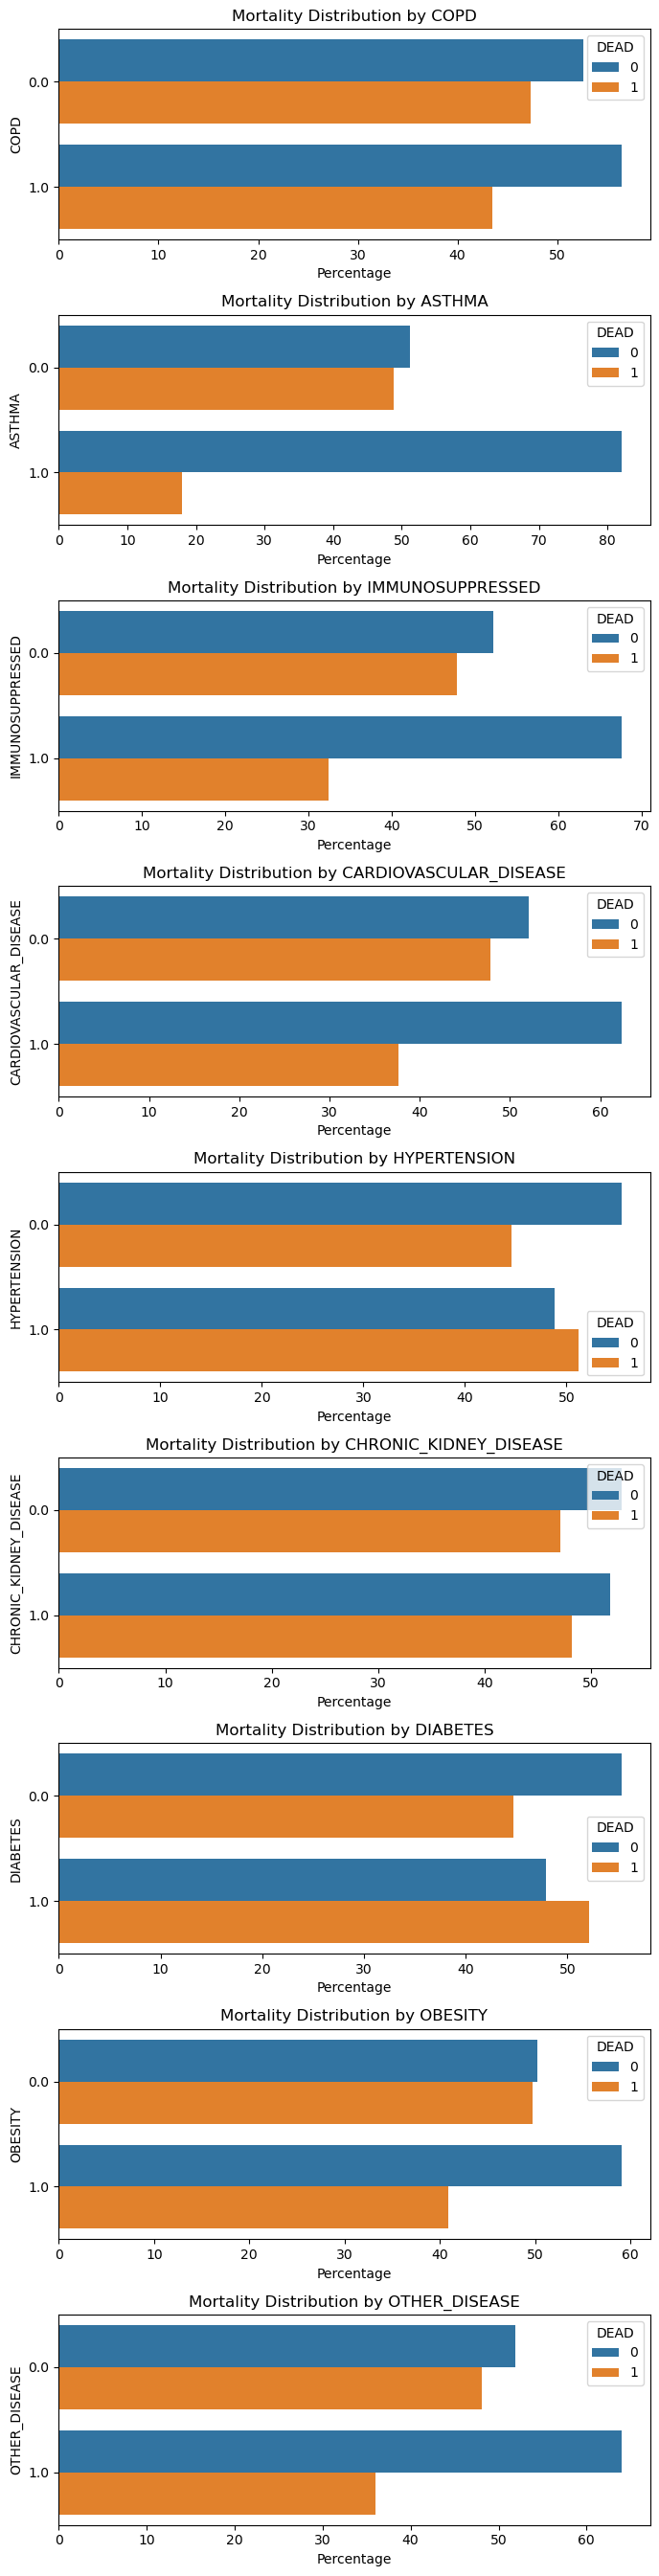

In [52]:
# Define the factors to analyze
factors = ['COPD', 'ASTHMA', 'IMMUNOSUPPRESSED', 'CARDIOVASCULAR_DISEASE', 'HYPERTENSION', 'CHRONIC_KIDNEY_DISEASE', 
           'DIABETES', 'OBESITY', 'OTHER_DISEASE']

# Create subplots dynamically based on the number of factors
fig, axes = plt.subplots(nrows=len(factors), ncols=1, figsize=(7, len(factors) * 3))

# Loop through each factor and create a bar plot
for i, factor in enumerate(factors):
    # Calculate the percentage distribution of DEAD within each factor
    death_distribution = covid.groupby(factor)['DEAD'].value_counts(normalize=True).mul(100).round(2)
    death_distribution = death_distribution.reset_index(name='Percentage')

    # Create the subplot
    sns.barplot(data=death_distribution, y=factor, x="Percentage", hue="DEAD", orient='h', ax=axes[i])
    axes[i].set_title(f"Mortality Distribution by {factor}")
    axes[i].set_xlabel("Percentage")
    axes[i].set_ylabel(factor)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


**1. In the case of asthma, immunosuppression, cardiovascular disease, obesity, and other diseases, the results are counterintuitive, as the mortality rate was lower among patients with these comorbidities than those without them.**

**2. In the case of COPD, the mortality rates are similar, with a slightly lower rate among patients with COPD.**

**3. In the case of hypertension, chronic kidney disease, and diabetes, mortality rates are higher among patients with these comorbidities compared to those without them, however only slightly. Additionally, more than 50% of patients with hypertension or diabetes did not survive.**


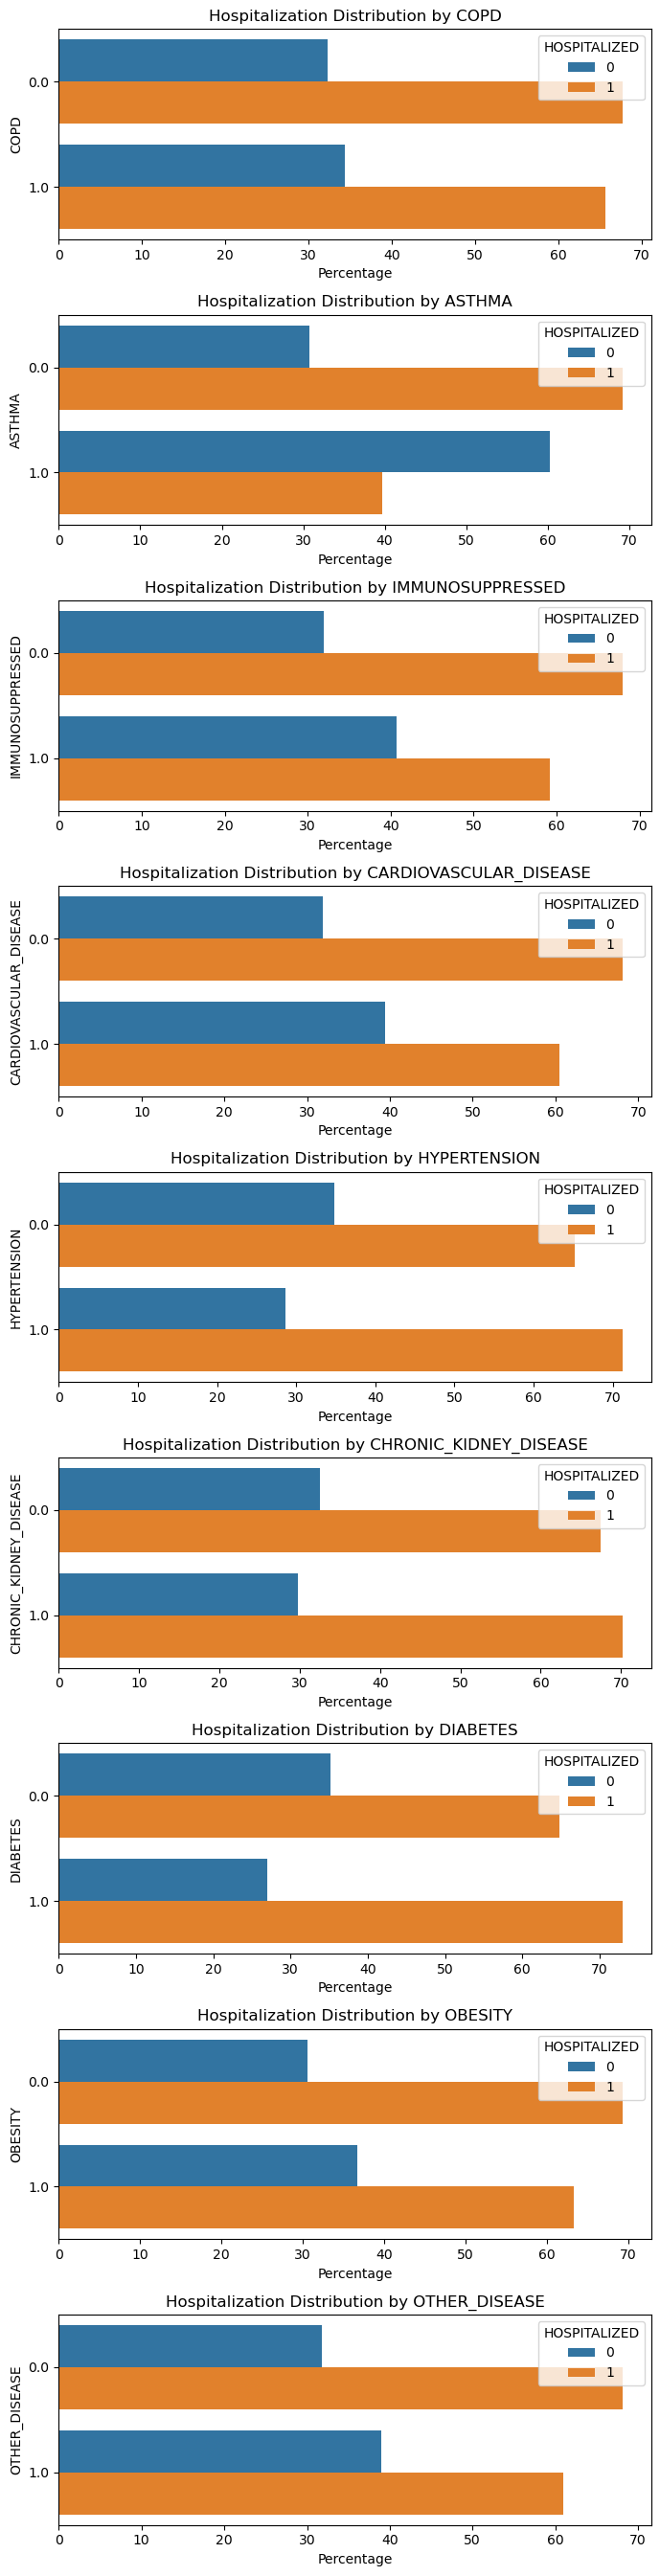

In [53]:
# Define the factors to analyze
factors = ['COPD', 'ASTHMA', 'IMMUNOSUPPRESSED', 'CARDIOVASCULAR_DISEASE', 'HYPERTENSION', 'CHRONIC_KIDNEY_DISEASE', 
           'DIABETES', 'OBESITY', 'OTHER_DISEASE']

# Create subplots dynamically based on the number of factors
fig, axes = plt.subplots(nrows=len(factors), ncols=1, figsize=(7, len(factors) * 3))

# Loop through each factor and create a bar plot
for i, factor in enumerate(factors):
    # Calculate the percentage distribution of DEAD within each factor
    hospitalization_distribution = covid.groupby(factor)['HOSPITALIZED'].value_counts(normalize=True).mul(100).round(2)
    hospitalization_distribution = hospitalization_distribution.reset_index(name='Percentage')

    # Create the subplot
    sns.barplot(data=hospitalization_distribution, y=factor, x="Percentage", hue='HOSPITALIZED', orient='h', ax=axes[i])
    axes[i].set_title(f"Hospitalization Distribution by {factor}")
    axes[i].set_xlabel("Percentage")
    axes[i].set_ylabel(factor)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


<Axes: xlabel='AGE', ylabel='Count'>

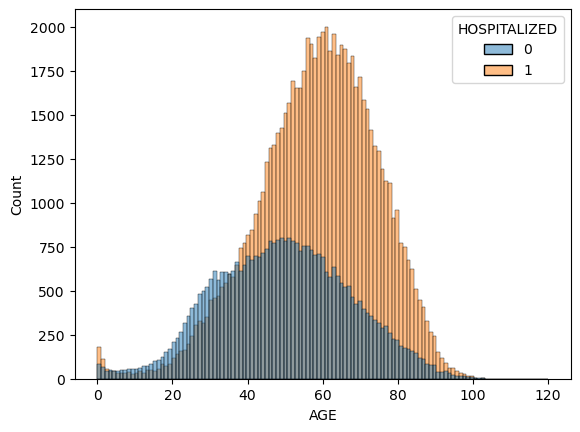

In [54]:
sns.histplot(data=covid, x="AGE", hue="HOSPITALIZED")

<Axes: xlabel='AGE', ylabel='Count'>

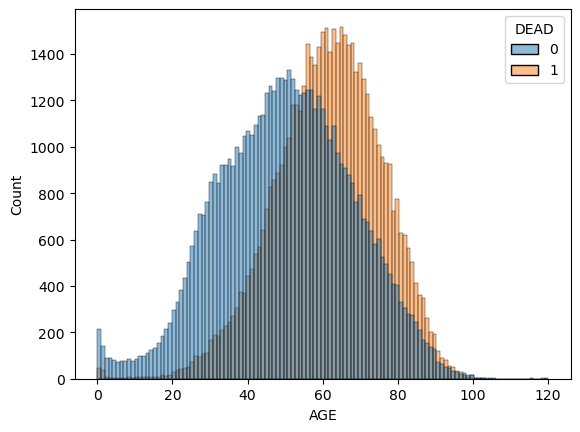

In [55]:
sns.histplot(data=covid, x="AGE", hue="DEAD")

<Axes: xlabel='DEAD', ylabel='AGE'>

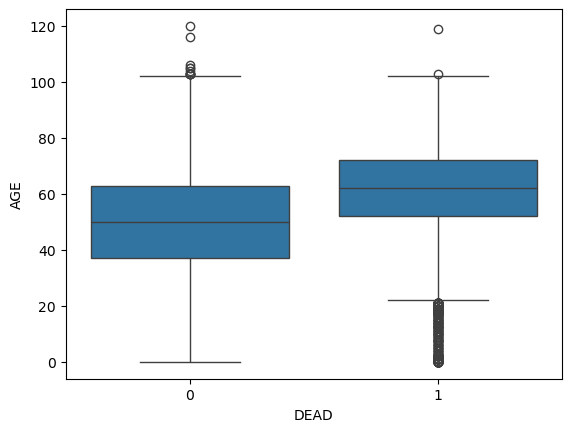

In [56]:
sns.boxplot(data=covid, x="DEAD", y="AGE")

<Axes: xlabel='DEAD', ylabel='AGE'>

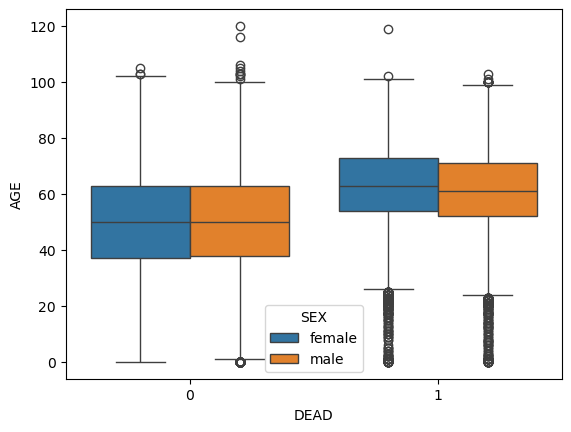

In [57]:
sns.boxplot(data=covid, x="DEAD", y="AGE", hue="SEX")

**The median age of patients who died was higher, around 65, compared to those who survived, whose median age was around 50. These median ages remained consistent across both genders.**

**Since the median age of deceased patients is higher and comorbidities are more likely to occur in middle-aged and older individuals, I wanted to examine whether these conditions have a greater impact on mortality in patients over 40. To explore this, I created bar plots showing the distribution of deaths across different comorbidities in this age group.**

In [58]:
covid_over_40 = covid[covid['AGE'] > 40]
covid_over_40

,COVID_TEST_RESULT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,DEAD,AGE,SEX,PREGNANT,SMOKER,PNEUMONIA,COPD,ASTHMA,IMMUNOSUPPRESSED,CARDIOVASCULAR_DISEASE,HYPERTENSION,CHRONIC_KIDNEY_DISEASE,DIABETES,OBESITY,OTHER_DISEASE,MEDICAL_UNIT
0,1,0,NaN,NaN,1,65,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,1,1,1.0,0.0,1,55,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,1,0,NaN,NaN,1,68,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,1,0,NaN,NaN,0,64,female,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,1,0,NaN,NaN,0,64,female,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113280,1,1,0.0,0.0,0,47,female,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13
113281,1,1,0.0,0.0,0,72,male,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,13
113283,1,0,NaN,NaN,0,67,female,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13
113284,1,1,0.0,0.0,0,77,female,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,13


In [59]:
death_gender_distribution_over_40 = covid_over_40.groupby('SEX')['DEAD'].value_counts(normalize=True).mul(100).round(2)
death_gender_distribution_over_40 = death_gender_distribution_over_40.reset_index(name='Percentage')
death_gender_distribution_over_40

,SEX,DEAD,Percentage
0,female,0,52.99
1,female,1,47.01
2,male,1,59.21
3,male,0,40.79


Text(0.5, 1.0, 'Mortality Distribution by Gender (Age over 40)')

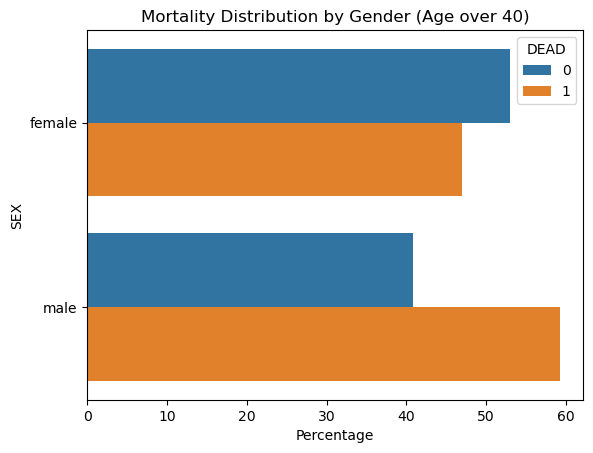

In [60]:
sns.barplot(data=death_gender_distribution_over_40, y="SEX", x="Percentage", hue="DEAD", orient='h')
plt.title("Mortality Distribution by Gender (Age over 40)") 

Text(0.5, 1.0, 'Mortality Distribution by Gender (All Ages)')

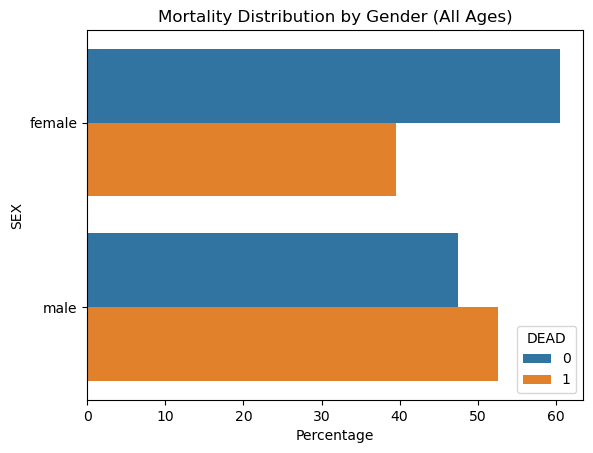

In [61]:
sns.barplot(data=death_gender_distribution, y="SEX", x="Percentage", hue="DEAD", orient='h')
plt.title("Mortality Distribution by Gender (All Ages)") 

**The difference in mortality rates between males and females remains consistent, with males having approximately 10-15% higher mortality than females, both in the overall population and among those over 40.**

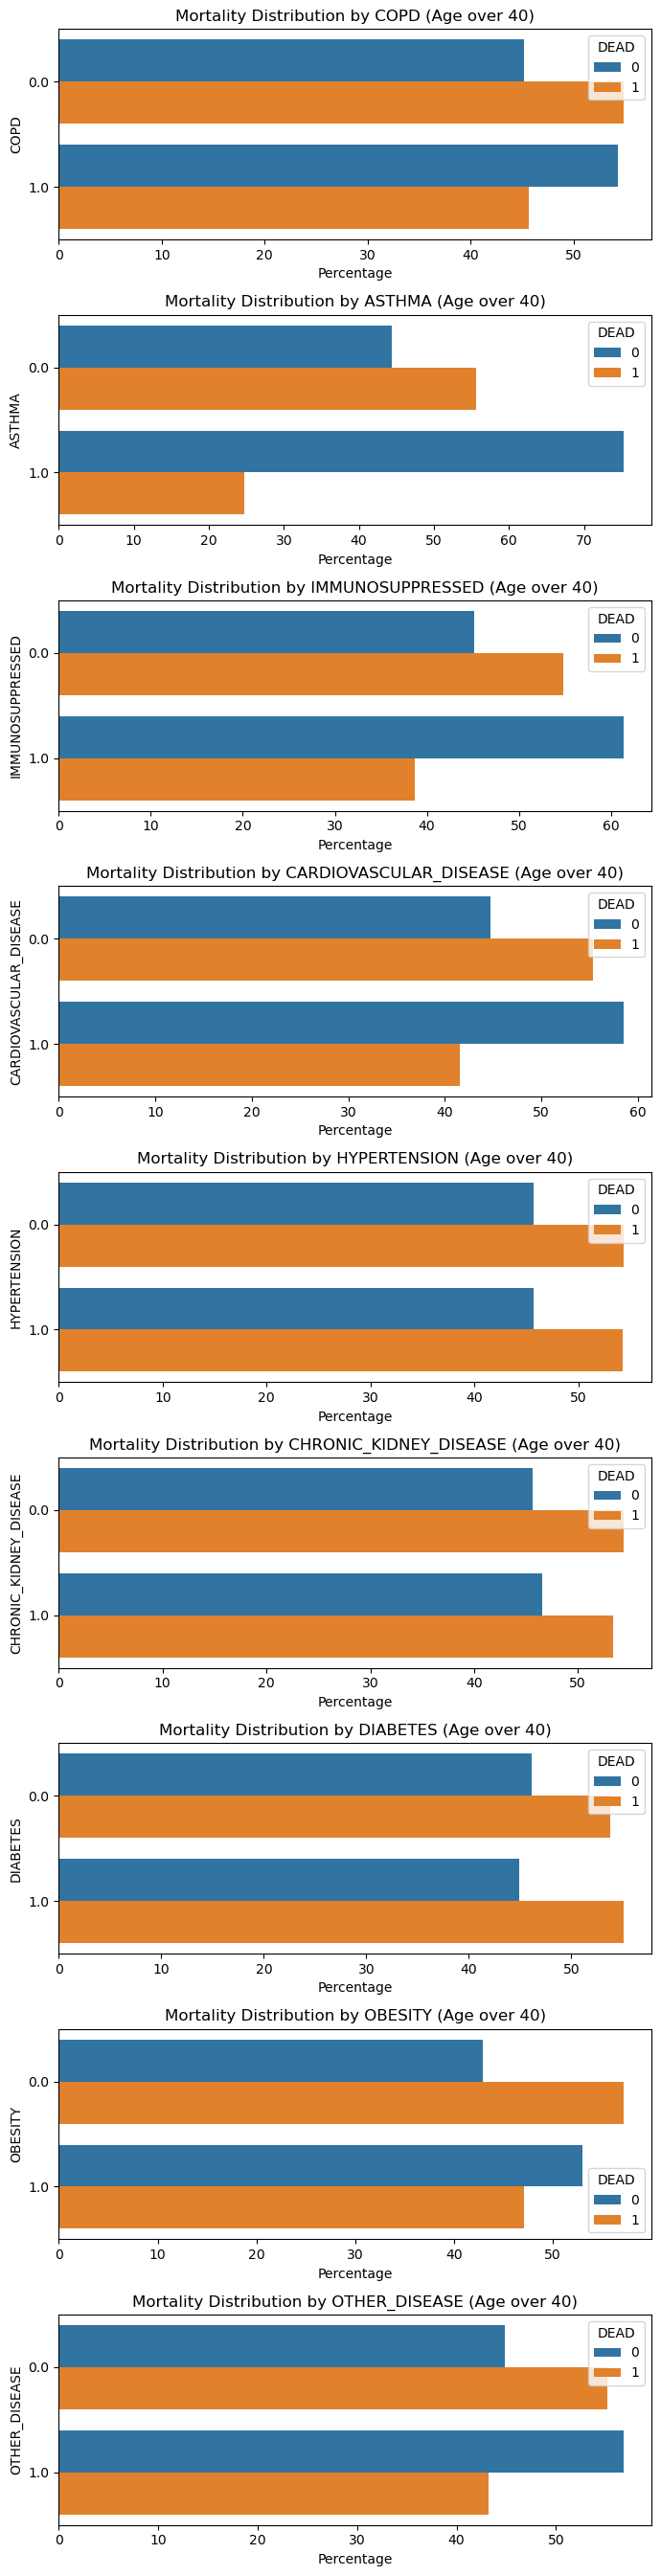

In [62]:
# Define the factors to analyze
factors = ['COPD', 'ASTHMA', 'IMMUNOSUPPRESSED', 'CARDIOVASCULAR_DISEASE', 'HYPERTENSION', 'CHRONIC_KIDNEY_DISEASE', 
           'DIABETES', 'OBESITY', 'OTHER_DISEASE']

# Create subplots dynamically based on the number of factors
fig, axes = plt.subplots(nrows=len(factors), ncols=1, figsize=(7, len(factors) * 3))

# Loop through each factor and create a bar plot
for i, factor in enumerate(factors):
    # Calculate the percentage distribution of DEAD within each factor
    death_distribution = covid_over_40.groupby(factor)['DEAD'].value_counts(normalize=True).mul(100).round(2)
    death_distribution = death_distribution.reset_index(name='Percentage')

    # Create the subplot
    sns.barplot(data=death_distribution, y=factor, x="Percentage", hue="DEAD", orient='h', ax=axes[i])
    axes[i].set_title(f"Mortality Distribution by {factor} (Age over 40)")
    axes[i].set_xlabel("Percentage")
    axes[i].set_ylabel(factor)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [63]:
# List of comorbidity columns
comorbidities = ['COPD', 'ASTHMA', 'IMMUNOSUPPRESSED', 'CARDIOVASCULAR_DISEASE', 
                 'HYPERTENSION', 'CHRONIC_KIDNEY_DISEASE', 'DIABETES', 'OBESITY', 'OTHER_DISEASE']

# Total number of patients
total_patients = len(covid_over_40)

# Count patients with each comorbidity and calculate percentage
comorbidity_counts = covid_over_40[comorbidities].sum()  # Count occurrences of '1' for each condition
comorbidity_percentages = (comorbidity_counts / total_patients * 100).round(1)  # Convert to percentage

# Create a DataFrame to display results
comorbidity_summary = pd.DataFrame({
    'Comorbidity': comorbidities,
    'Count': comorbidity_counts.values,
    'Percentage': comorbidity_percentages.values
})

# Display the DataFrame
comorbidity_summary

,Comorbidity,Count,Percentage
0,COPD,5465.0,6.0
1,ASTHMA,3908.0,4.3
2,IMMUNOSUPPRESSED,3171.0,3.5
3,CARDIOVASCULAR_DISEASE,6660.0,7.3
4,HYPERTENSION,40991.0,44.9
5,CHRONIC_KIDNEY_DISEASE,6050.0,6.6
6,DIABETES,35208.0,38.6
7,OBESITY,25350.0,27.8
8,OTHER_DISEASE,5611.0,6.2


#### **Results for Patients Over 40:**
##### 1. Asthma, Immunosuppression, Cardiovascular Disease, Obesity, and Other Diseases
Similar to the overall population, mortality rates remain lower among patients with these comorbidities than those without them, which is counterintuitive.
##### 2. COPD
Mortality is unexpectedly lower among patients with COPD compared to those without it. Additionally, the difference in mortality rates is now more pronounced than in the overall population.
##### 3. Hypertension, Chronic Kidney Disease, and Diabetes
Mortality rates are now roughly the same for patients with and without these comorbidities.

More than 50% of patients in this age group did not survive, regardless of whether they had these conditions, and their mortality rates were similar.**


### **Summary of the Results and Conclusions**
1. **Smoking and Mortality**:
Smoking status did not emerge as a strong predictor of severe COVID-19 outcomes, as mortality rates were relatively similar between smokers and non-smokers.

2. **Gender and Mortality**:
Males had a higher mortality rate and lower survival rate compared to females. This aligns with some studies suggesting that males may be at greater risk of severe outcomes, including death, from COVID-19.

3. **Pneumonia**:
Around 90% of COVID-19 patients who developed pneumonia were hospitalized, compared to only 40% of those without pneumonia.
Mortality was nearly 2.5 times higher in patients with pneumonia, highlighting it as a critical factor in disease severity.
However, pneumonia is a result of infection rather than a pre-existing comorbidity.
4. **Intubation**:
Nearly 90% of intubated patients did not survive.
Since intubation is typically used as a last resort for critically ill patients, this high mortality rate likely reflects the severity of their condition rather than the procedure itself.
#### **Contradictions and Possible Explanations for Comorbidities**
1. **Age as a Confounding Factor**
- Comorbidities are more prevalent in older adults, making their individual impact harder to distinguish when analyzing patients over 40. Since most already might have at least one comorbidity, it becomes difficult to determine whether their increased mortality risk is due to the comorbidity itself or simply age-related vulnerability.
- Additionally, some patients might not have been aware of underlying conditions such as diabetes or hypertension. By excluding younger, generally healthier individuals, we may have inadvertently increased the percentage of undiagnosed cases in the older group.
- In older patients, the baseline mortality risk is already high, which could reduce the relative impact of comorbidities.
2. **Survivorship Bias and Data Limitations**
- Patients with severe comorbidities may not have survived long enough to be hospitalized or tested, leading to an underrepresentation of the most vulnerable cases.
- Differences in treatment, healthcare access, or sample size within specific subgroups might also influence the results.
3. **Severity of Illness vs. Comorbidities**
- Some comorbidities, such as hypertension and diabetes, are common in older adults, but their direct contribution to mortality may be overshadowed by other factors, such as pneumonia or respiratory failure.
- In contrast, conditions like COPD, which directly affect the lungs, might have had unexpected interactions with COVID-19. Surprisingly, mortality was lower among COPD patients than those without the condition, and the difference became even more pronounced in older patients. Possible explanations might be the fact that many COPD patients are on bronchodilators, corticosteroids, or other medications that might have reduced severe inflammation linked to COVID-19 or the dataset might not include the most severe COPD cases, leading to an overrepresentation of mild-to-moderate cases with better survival rates.
#### **Main Conclusions:**
##### 1. Age is the strongest predictor of mortality, with older patients facing significantly higher risk regardless of comorbidities.
##### 2. Comorbidities do not always increase mortality risk in a linear or predictable way. Their impact may depend on interactions with other factors, such as disease severity or treatment received.
##### 3. **More detailed statistical testing is needed to properly assess the independent effect of each comorbidity while controlling for age and other variables.**